In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
iris=datasets.load_iris()

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target.shape

(150,)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
X=iris.data[:,[2,3]]

In [9]:
X.shape

(150, 2)

In [10]:
y=iris.target

In [11]:
print('Class Labels', np.unique(y))

Class Labels [0 1 2]


In [12]:
import sklearn.model_selection


In [14]:
trainX,testX,trainy,testy=sklearn.model_selection.train_test_split(X,y,test_size=0.2, shuffle=True,random_state=2)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model=LinearRegression()

In [17]:
model.fit(trainX,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
predictions=model.predict(testX)

In [19]:
predictions

array([ 0.02276948, -0.0274191 ,  1.73709891, -0.1101029 ,  0.03757136,
        1.60133506, -0.01117148,  1.73420745,  1.9010208 ,  0.02276948,
       -0.0274191 , -0.05991433, -0.07616194,  0.13794852,  1.39011606,
        1.33992749,  0.00652187,  1.14206464,  2.18301319,  1.10956941,
        1.53779033,  1.15831225,  1.98515034,  1.14206464,  1.17455987,
       -0.01117148, -0.05991433,  1.58797891,  0.17044375,  1.76670268])

In [23]:
predictions=np.array(predictions).astype(int)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(testy,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.53      1.00      0.70         8
           2       1.00      0.12      0.22         8

    accuracy                           0.77        30
   macro avg       0.84      0.71      0.64        30
weighted avg       0.88      0.77      0.71        30



In [26]:
accuracy_score(testy,predictions)

0.7666666666666667

#Losgistic Regression using Sklearn

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model=LogisticRegression()

In [30]:
model.fit(trainX,trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predictions=model.predict(testX)

In [32]:
predictions

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [33]:
print(classification_report(testy,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



#Decision boundary Logistic Regression

In [34]:
import numpy as np
from math import *


In [35]:
def logistic_regression(X, y, alpha):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(n+1)
    h = hypothesis(theta, X, n)
    theta, theta_history, cost = Gradient_Descent(theta, alpha
                                 , 100000, h, X, y, n)
    return theta, theta_history, cost


In [36]:
def Gradient_Descent(theta, alpha, num_iters, h, X, y, n):
    theta_history = np.ones((num_iters,n+1))
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h - y) *
                                   X.transpose()[j])
        theta_history[i] = theta
        h = hypothesis(theta, X, n)
        cost[i] = (-1/X.shape[0]) * sum(y * np.log(h) + (1 - y) * 
                                        np.log(1 - h))
    theta = theta.reshape(1,n+1)
    return theta, theta_history, cost


In [37]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = 1 / (1 + exp(-float(np.matmul(theta, X[i]))))
    h = h.reshape(X.shape[0])
    return h

In [40]:
data = np.loadtxt('dataset.txt', delimiter=',')


In [41]:
X_train = data[:,[0,1]]
y_train = data[:,2]
theta, theta_history, cost = logistic_regression(X_train, y_train
                                                 , 0.001)

In [45]:
X=np.concatenate((np.ones((X_train.shape[0],1)), X_train),axis= 1)
h=hypothesis(theta, Xp, Xp.shape[1] - 1)

Text(0, 0.5, 'Marks obtained in 2nd Exam')

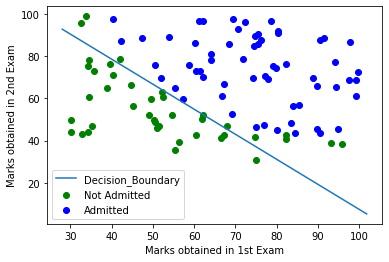

In [48]:
c0 = c1 = 0 # Counter of label 0 and label 1 instances
for i in range(0, X.shape[0]):
    if y_train[i] == 0:
        c0 = c0 + 1
    else:
        c1 = c1 + 1
x0 = np.ones((c0,2)) # matrix label 0 instances
x1 = np.ones((c1,2)) # matrix label 1 instances
k0 = k1 = 0
for i in range(0,y_train.shape[0]):
    if y_train[i] == 0:
        x0[k0] = X_train[i]
        k0 = k0 + 1
    else:
        x1[k1] = X_train[i]
        k1 = k1 + 1
X = [x0, x1]
colors = ["green", "blue"] # colours for Scatter Plot
theta = theta.reshape(3)
# getting the x co-ordinates of the decision boundary
plot_x = np.array([min(X_train[:,0]) - 2, max(X_train[:,0]) + 2])
# getting corresponding y co-ordinates of the decision boundary
plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])
# Plotting the Single Line Decision Boundary
for x, c in zip(X, colors):
    if c == "green":
        plt.scatter(x[:,0], x[:,1], color = c, label = "Not Admitted")
    else:
        plt.scatter(x[:,0], x[:,1], color = c, label = "Admitted")
plt.plot(plot_x, plot_y, label = "Decision_Boundary")
plt.legend()
plt.xlabel("Marks obtained in 1st Exam")
plt.ylabel("Marks obtained in 2nd Exam")